## How a butterfly's wings took the world by storm
by Ricardo C. Alindayu II, United Coders of Eskwelabs

Updated on 1 Jun 2020

#### The butterfly effect: an unassuming story that would deeply influence popular culture

You may have heard of the butterfly effect at least once in your life. The term has been heavily used in film, television and music, all containing the same message that small changes in the present can lead to very drastic changes in the future. The 2004 movie The Butterfly Effect starring Ashton Kutcher made its namesake the central theme of the story: Kutcher's character travels back in time to change his past, leading to unintended consequences upon returning to the present. While it obviously sounds like science fiction, the butterfly effect as a concept has its origins rooted in a branch of mathematics called chaos theory.

Chaos theory was born on a Royal McBee LGP-30 computer which meteorologist Edward Lorenz used to model weather patterns using only 12 variables. Wanting to see a specific set of data again, he restarted a few calculations in the middle of a simulation and to his surprise, found very different numerical results from the original. Upon checking the discrepancy, a simple round off from six decimal places to three caused the change in calculated data. From intuition, a small rounding of numbers at the thousandths place should have little to no bearing on calculations, but the results proved otherwise. This led to Lorenz's theory on the sensitivity of initial conditions to expected outcomes now known as chaos theory.

#### The Lorenz system: a classic model for chaos theory

Lorenz proudly reported his theory to the American Association for the Advancement of Science with a presentation entitled “Predictability: Does the Flap of a Butterfly's Wings in Brazil Set off a Tornado in Texas?”, ultimately birthing the term we know as the butterfly effect today.

Mathematically speaking, chaos theory can be represented by three equations known as the Lorenz system. 

$$
\begin{cases} \dfrac{dx}{dt} = \sigma(y - x) \\ \dfrac{dy}{dt} = x(\rho-z)-y \\ \dfrac{dz}{dt} = xy - \beta z \end{cases}
$$

The system is a set of three nonlinear first order differential equations describing atmospheric conditions in four variables and three parameters.

| Variable | Definition |
| :-: | :--- |
| x | Intensity of convection currents. |
| y | Change in temperature from the horizontal axis. |
| z | Change in temperature from the vertical axis. |
| t | Time elapsed from initial conditions. |

Take note that the variables do not represent the three directions in 3D space, but rather, describe motion of currents in terms of temperature and strength of flow.

The equations have three constants or parameters which describe the system in question.

| Parameter | Dimensionless Number | Description |
| :--- | :-: | :--- |
| $$\sigma$$ | Prandtl Number | Refers to the ratio of momentum diffusivity to thermal diffusivity. |
| $$\rho$$ | Rayleigh Number | Refers to the relationship of buoyancy and viscosity in a fluid. |
| $$\beta$$ | Geometric Factor | Refers to the relationship of the height and width of the system. |

Lorenz illustrated his equations with specific constants for the dimensionless numbers as illustrated in the Python code below.

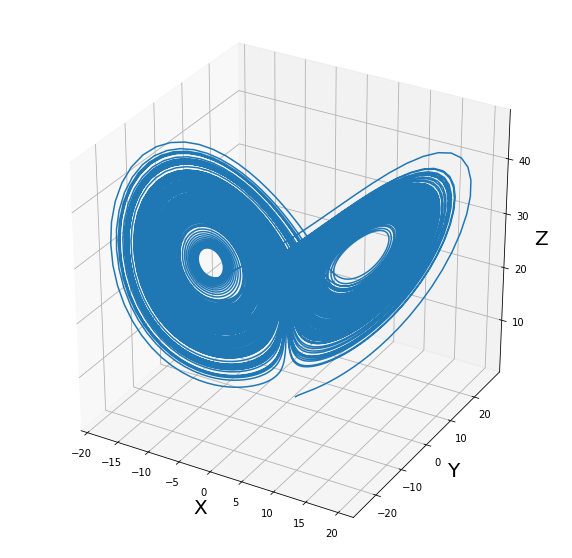

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# parameters
sigma = 10
rho = 28
beta = 8/3

def f(state, t):
    x, y, z = state  # unpack the state vector
    return sigma*(y-x), x*(rho-z)-y, x*y - beta*z  # derivatives
state0 = [1.0, 1.0, 1.0] 
t = np.arange(0.0, 200.0, 0.01)
states = odeint(f, state0, t)
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
plt.show()

The butterfly-like graph in the figure above is often called a Lorenz attractor. Changing the parameters' values even by a small amount would change the behavior of the system as illustrated by the 3D graph.

#### Diffusionless Lorenz equations: a simplification of the Lorenz system

We can further simplify these three parameters into a single parameter by assuming a condition called diffusionless convection. Recall conduction in your 3rd grade science class. This refers to the transfer of heat by the vibration of molecules on the hotter edge colliding with its neighbouring molecules.

In the real world, both conduction and convection occur at the same time when heating a fluid like water or air. To simplify the equations, we assume that convection dominates heat transfer. Mathematically, we do this by setting the Prandtl Number and the Rayleigh number to infinity. Rescaling the equations, the diffusionless Lorenz equations would look appear as follows:

$$
\begin{cases} \dfrac{dx}{dt} = y - x \\ \dfrac{dy}{dt} = -xz \\ \dfrac{dz}{dt} = xy - R \end{cases}
$$

The four variables remain as is, while the three parameters in the original set of equations are combined into one constant R.

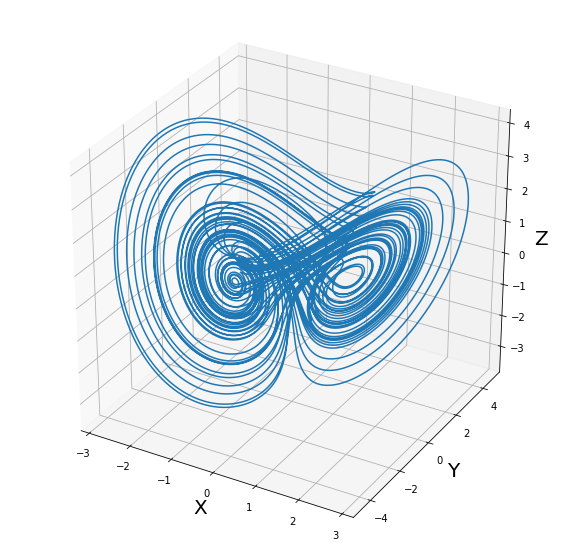

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# single parameter R (combination of the 3 original parameters)
R = 1.00000

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return y - x, -x*z, x*y - R  # Derivatives
state0 = [1.0, 1.0, 1.0] 
t = np.arange(0.0, 500.0, 0.01)
states = odeint(f, state0, t)
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
plt.show()

Try changing R to a value of 1.00001. There's a huge difference in the results. As a result, the diffusionless Lorenz equations are chaotic.

#### Applications of chaos theory in the real world

This exercise may seem like only generating pretty figures, but in reality, chaos theory has seen strong applications in the real world.

##### For weather prediction
The origin of the Lorenz system was to serve as a model for weather patterns. Particularly, the weather is generally unpredictable of its chaotic nature, so the standard is to set multiple predictions rather than a single one.

##### For cryptography
Chaotic systems make good candidates for generation of pseudorandom numbers for security purposes. An example would be for the encryption of messages on a secured application. One device would send out a chaotic signal with a message embedded inside, while the other device would remove the signal to unveil the message. Carroll, et al. (2010) describes using the equations to increase the number of codes generated, making it difficult for a cryptanalyst (someone who can crack codes) to decipher the hidden messages. 

##### For the human body
Chaos theory has been used to control arrhythmia, or the unperiodic pumping of the heart. Using a consistent rhythm to control the irregularity in heart beat proved too difficult, whereas providing a more chaotic response actually was a bit more predictive to the uncontrollable nature of the heart.

#### What now?

You probably won't be applying the math directly to your life. But think about its complexity: how can a simple set of equations generate very different outcomes given minor changes in initial conditions? There is so much beauty in chaos that perhaps we can somewhat apply it to our lives. Do small things now, no matter how trivial, as long as it leads you to the end goal. Code at least once a day, learn a new word, or do a single push up. Who knows, that small step you take now can lead you to become the next top programmer on Kaggle, or a polyglot, or a fitness expert. We can never predict the future, but definitely, you can steer towards it in the present.

#### References

1. Edward Lorenz, Encyclopedia Britannica. (2020) https://www.britannica.com/biography/Edward-Lorenz.
2. Van der Schrier, G. & Maas, L. (2000). The diffusionless Lorenz equations; Shil’nikov bifurcations and reduction to an explicit map. Physica D Nonlinear Phenomena, 141(1-2): 19-36.
3. Xu, Y., et al. (2012). Chaos in diffusionless Lorenz system with a fractional order and its control. International Journal of Bifurcation and Chao, (22)04.
4. Yurkon, G. Introduction to Chaos and Its Real World Applications. (1997). http://csuw3.csuohio.edu/sciences/dept/physics/physicsweb/kaufman/yurkon/chaos.html
